In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 1000)

In [20]:
train_val = pd.read_csv("pumptrain_values.csv")
train_lab = pd.read_csv("pumptrain_labels.csv")
test_lab = pd.read_csv("pumptest_values.csv")
train = pd.merge(train_val, train_lab)
train.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [122]:
t1 = train._get_numeric_data()
t1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


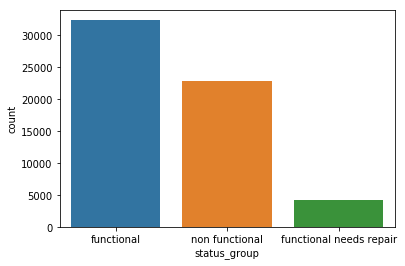

In [20]:
sns.countplot(train.status_group)

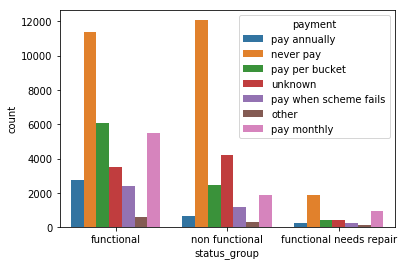

In [18]:
sns.countplot(x='status_group', data=train, hue='payment')

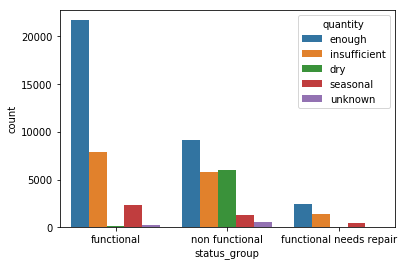

In [26]:
# dry quantity has more non functional
sns.countplot(x='status_group', data=train, hue='quantity')

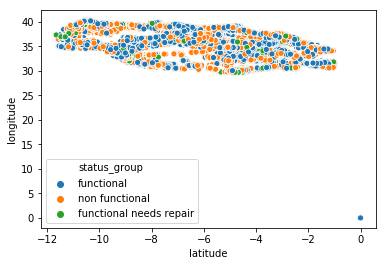

In [35]:
sns.scatterplot(y=train.longitude, x=train.latitude, hue=train.status_group)

In [21]:
#dropping un-necessary columns 
train.drop(['scheme_name','source_type','recorded_by', 'extraction_type_group','payment_type',
            'quality_group','quantity_group','ward'], axis=1, inplace=True)

In [4]:
import pandas_profiling

In [5]:
pandas_profiling.ProfileReport(train)

Number of variables,33
Number of observations,59400
Total Missing (%),0.9%
Total size in memory,15.4 MiB
Average record size in memory,272.0 B
Numeric,10
Categorical,23
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [6]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,109,True,VWC,False,1999,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,280,NaN,Other,True,2010,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,250,True,VWC,True,2009,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,58,True,VWC,True,1986,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,0,True,NaN,True,0,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
train.isna().sum().sort_values(ascending=False)[:7]

scheme_management    3877
installer            3655
funder               3635
public_meeting       3334
permit               3056
subvillage            371
status_group            0
dtype: int64

In [27]:
train.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [8]:
ad=train.corr()
ad.style.background_gradient(cmap='coolwarm')

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1,-0.00532096,-0.00469226,-0.00134774,0.00171845,-0.00262871,-0.00302829,-0.0030437,-0.00281275,-0.00208209
amount_tsh,-0.00532096,1,0.0766503,0.0221342,-0.0526702,0.00294373,-0.026813,-0.0235994,0.0162876,0.0679152
gps_height,-0.00469226,0.0766503,1,0.149155,-0.0357514,0.00723688,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.00134774,0.0221342,0.149155,1,-0.425802,0.0238733,0.034197,0.151398,0.0865897,0.396732
latitude,0.00171845,-0.0526702,-0.0357514,-0.425802,1,0.00683683,-0.221018,-0.20102,-0.0221519,-0.245278
num_private,-0.00262871,0.00294373,0.00723688,0.0238733,0.00683683,1,-0.0203768,-0.00447751,0.00381836,0.0260556
region_code,-0.00302829,-0.026813,-0.183521,0.034197,-0.221018,-0.0203768,1,0.678602,0.0940884,0.0317241
district_code,-0.0030437,-0.0235994,-0.171233,0.151398,-0.20102,-0.00447751,0.678602,1,0.0618314,0.0483152
population,-0.00281275,0.0162876,0.135003,0.0865897,-0.0221519,0.00381836,0.0940884,0.0618314,1,0.26091
construction_year,-0.00208209,0.0679152,0.658727,0.396732,-0.245278,0.0260556,0.0317241,0.0483152,0.26091,1


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

train1 = train._get_numeric_data() #drop non-numeric cols
# Y=train.status_group
# X=train1.drop(['status_group'], axis=1)
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(train1.values, i) for i in range(train1.shape[1])]
vif["features"] = train1.columns
pd.DataFrame(list(sorted(zip(vif.VIF_Factor, vif.features))))

,0,1
0,1.003519,num_private
1,1.020955,amount_tsh
2,1.246241,population
3,2.538829,district_code
4,3.284939,region_code
5,3.638793,id
6,3.719267,gps_height
7,6.224720,latitude
8,6.365857,construction_year
9,10.693218,longitude


In [10]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,109,True,VWC,False,1999,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,280,NaN,Other,True,2010,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,250,True,VWC,True,2009,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,58,True,VWC,True,1986,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,0,True,NaN,True,0,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [22]:
train['Month'] = pd.to_datetime(train['date_recorded']).dt.month

In [23]:
train['Day'] = pd.to_datetime(train['date_recorded']).dt.day

In [24]:
train['scheme_management'].fillna(train['scheme_management'].mode()[0], inplace=True)

In [25]:
train["permit"].fillna("True", inplace = True)
train["public_meeting"].fillna("True", inplace = True)

In [26]:
(train.isna().sum().sort_values(ascending=False)/len(train))*100

installer                6.153199
funder                   6.119529
subvillage               0.624579
Day                      0.000000
num_private              0.000000
district_code            0.000000
region_code              0.000000
region                   0.000000
basin                    0.000000
latitude                 0.000000
wpt_name                 0.000000
population               0.000000
longitude                0.000000
gps_height               0.000000
date_recorded            0.000000
amount_tsh               0.000000
lga                      0.000000
public_meeting           0.000000
Month                    0.000000
water_quality            0.000000
status_group             0.000000
waterpoint_type_group    0.000000
waterpoint_type          0.000000
source_class             0.000000
source                   0.000000
quantity                 0.000000
payment                  0.000000
scheme_management        0.000000
management_group         0.000000
management    

In [27]:
train=train[train.construction_year > 0]
train=train[train.population > 0]
train.shape

(37344, 35)

In [28]:
train=train.drop(['subvillage','funder','installer'], axis=1)

In [29]:
train=train.drop(['wpt_name','extraction_type','waterpoint_type_group'],axis=1)

In [30]:
train.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group,Month,Day
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,Ludewa,109,True,VWC,False,1999,gravity,vwc,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,functional,3,14
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,Serengeti,280,True,Other,True,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,3,6
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,Simanjiro,250,True,VWC,True,2009,gravity,vwc,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,2,25
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,True,VWC,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional,1,28
5,9944,20.0,2011-03-13,0,39.172796,-4.765587,0,Pangani,Tanga,4,8,Mkinga,1,True,VWC,True,2009,submersible,vwc,user-group,pay per bucket,salty,enough,other,unknown,communal standpipe multiple,functional,3,13


In [31]:
train=pd.concat([pd.get_dummies(train['basin'], drop_first = True),train],axis=1).drop('basin',axis=1)
train=pd.concat([pd.get_dummies(train['region'], drop_first = True),train],axis=1).drop('region',axis=1)
train=pd.concat([pd.get_dummies(train['lga'], drop_first = True),train],axis=1).drop('lga',axis=1)
train=pd.concat([pd.get_dummies(train['scheme_management'], drop_first = True),train],axis=1).drop('scheme_management',axis=1)
train=pd.concat([pd.get_dummies(train['extraction_type_class'], drop_first = True),train],axis=1).drop('extraction_type_class',axis=1)
train=pd.concat([pd.get_dummies(train['management'], drop_first = True),train],axis=1).drop('management',axis=1)
train=pd.concat([pd.get_dummies(train['management_group'], drop_first = True),train],axis=1).drop('management_group',axis=1)
train=pd.concat([pd.get_dummies(train['payment'], drop_first = True),train],axis=1).drop('payment',axis=1)
train=pd.concat([pd.get_dummies(train['water_quality'], drop_first = True),train],axis=1).drop('water_quality',axis=1)
train=pd.concat([pd.get_dummies(train['quantity'], drop_first = True),train],axis=1).drop('quantity',axis=1)
train=pd.concat([pd.get_dummies(train['source'], drop_first = True),train],axis=1).drop('source',axis=1)
train=pd.concat([pd.get_dummies(train['source_class'], drop_first = True),train],axis=1).drop('source_class',axis=1)
train=pd.concat([pd.get_dummies(train['waterpoint_type'], drop_first = True),train],axis=1).drop('waterpoint_type',axis=1)
train=pd.concat([pd.get_dummies(train['public_meeting'], drop_first = True),train],axis=1).drop('public_meeting',axis=1)
train=pd.concat([pd.get_dummies(train['permit'], drop_first = True),train],axis=1).drop('permit',axis=1)
# train=pd.concat([pd.get_dummies(train['ward'], drop_first = True),train],axis=1).drop('ward',axis=1)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import ADASYN
from sklearn.metrics import cohen_kappa_score


In [33]:
train=train.drop(['date_recorded'], axis=1)

In [34]:
train=train.drop(['id'], axis=1)

In [35]:
train.head()

,True,True,True,True,communal standpipe,communal standpipe multiple,dam,hand pump,improved spring,other,surface,unknown,hand dtw,lake,machine dbh,other,rainwater harvesting,river,shallow well,spring,unknown,enough,insufficient,seasonal,unknown,fluoride,fluoride abandoned,milky,salty,salty abandoned,soft,unknown,other,pay annually,pay monthly,pay per bucket,pay when scheme fails,unknown,other,parastatal,unknown,user-group,other,other - school,parastatal,private operator,trust,unknown,vwc,water authority,water board,wua,wug,handpump,motorpump,other,rope pump,submersible,wind-powered,None,Other,Parastatal,Private operator,SWC,Trust,VWC,WUA,WUG,Water Board,Water authority,Arusha Urban,Babati,Bagamoyo,Bariadi,Bunda,Hai,Hanang,Handeni,Ilala,Ilemela,Iramba,Iringa Rural,Karatu,Kasulu,Kibaha,Kibondo,Kigoma Rural,Kigoma Urban,Kilindi,Kilolo,Kilombero,Kilosa,Kilwa,Kinondoni,Kisarawe,Kiteto,Korogwe,Lindi Rural,Lindi Urban,Liwale,Longido,Ludewa,Lushoto,Manyoni,Masasi,Mbinga,Mbulu,Meru,Mkinga,Mkuranga,Monduli,Morogoro Rural,Morogoro Urban,Moshi Rural,Moshi Urban,Mpanda,Mtwara Rural,Mtwara Urban,Muheza,Musoma Rural,Mvomero,Mwanga,Nachingwea,Namtumbo,Nanyumbu,Newala,Ngorongoro,Njombe,Nkasi,Pangani,Rombo,Rorya,Ruangwa,Rufiji,Same,Serengeti,Siha,Simanjiro,Singida Rural,Singida Urban,Songea Rural,Songea Urban,Sumbawanga Rural,Sumbawanga Urban,Tandahimba,Tanga,Tarime,Temeke,Tunduru,Ukerewe,Ulanga,Dar es Salaam,Iringa,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,Morogoro,Mtwara,Mwanza,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tanga,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group,Month,Day
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,functional,3,14
1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,functional,3,6
2,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,25.0,686,37.460664,-3.821329,0,21,4,250,2009,functional,2,25
3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,263,38.486161,-11.155298,0,90,63,58,1986,non functional,1,28
5,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,20.0,0,39.172796,-4.765587,0,4,8,1,2009,functional,3,13


In [147]:
train.dtypes

id                         int64
amount_tsh               float64
gps_height                 int64
longitude                float64
latitude                 float64
num_private                int64
basin                     object
region                    object
region_code                int64
district_code              int64
lga                       object
population                 int64
public_meeting            object
scheme_management         object
permit                    object
construction_year          int64
extraction_type_class     object
management                object
management_group          object
payment                   object
water_quality             object
quantity                  object
source                    object
source_class              object
waterpoint_type           object
status_group              object
Month                      int64
Day                        int64
dtype: object

In [191]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.status_group=le.fit_transform(train.status_group)

In [159]:
train.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group,Month,Day
0,69572,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,5,Ludewa,109,True,VWC,False,1999,gravity,vwc,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,0,3,14
1,8776,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Mara,20,2,Serengeti,280,True,Other,True,2010,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,0,3,6
2,34310,25.0,686,37.460664,-3.821329,0,Pangani,Manyara,21,4,Simanjiro,250,True,VWC,True,2009,gravity,vwc,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,0,2,25
3,67743,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,True,VWC,True,1986,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,2,1,28
5,9944,20.0,0,39.172796,-4.765587,0,Pangani,Tanga,4,8,Mkinga,1,True,VWC,True,2009,submersible,vwc,user-group,pay per bucket,salty,enough,other,unknown,communal standpipe multiple,0,3,13


In [36]:
Y=train.status_group
X=train.drop(['status_group'], axis=1)
#X = pd.get_dummies(X)

In [37]:
#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=32, stratify= Y)

In [54]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier(criterion='gini', max_depth=10,min_samples_split=10 ,random_state=99) 
model.fit(X_train, y_train)

x_predrf = model.predict(X_train)
y_predrf = model.predict(X_test)
print("Accuracy Test: ", accuracy_score(y_test, y_predrf))
print("Accuracy Train: ", accuracy_score(y_train, x_predrf))

print("Precesion Test: ", precision_score(y_test, y_predrf, average='weighted'))
print("Precesion: Train", precision_score(y_train, x_predrf, average='weighted'))

print("Recall: Test", recall_score(y_test, y_predrf, average='weighted'))
print("Recall: Train", recall_score(y_train, x_predrf, average='weighted'))

print('Confusion_Matrix',confusion_matrix(y_test, y_predrf))
print('Classification_Report',classification_report(y_test,y_predrf ))

print('KAPPA SCORE: ',cohen_kappa_score(y_test,y_predrf ))
pd.crosstab(y_test, y_predrf, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Test:  0.759014637629418
Accuracy Train:  0.7946442234123948
Precesion Test:  0.7592797212200179
Precesion: Train 0.802550915522149
Recall: Test 0.759014637629418
Recall: Train 0.7946442234123948
Confusion_Matrix [[5728   45  440]
 [ 536  119   95]
 [1531   53 2657]]
Classification_Report                          precision    recall  f1-score   support

             functional       0.73      0.92      0.82      6213
functional needs repair       0.55      0.16      0.25       750
         non functional       0.83      0.63      0.71      4241

              micro avg       0.76      0.76      0.76     11204
              macro avg       0.71      0.57      0.59     11204
           weighted avg       0.76      0.76      0.74     11204

KAPPA SCORE:  0.5228524674081758


Predicted,functional,functional needs repair,non functional,All
True,,,,
functional,5728,45,440,6213
functional needs repair,536,119,95,750
non functional,1531,53,2657,4241
All,7795,217,3192,11204


In [50]:
from sklearn.model_selection import KFold, cross_val_score
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1) 
score = (cross_val_score(model, X_train, y_train, scoring='accuracy', cv=crossvalidation, n_jobs=1)) 
score


array([0.78538638, 0.80107116, 0.78921194, 0.78500383, 0.77888294,
       0.77926549, 0.79762816, 0.7903596 , 0.79609793, 0.78079572])

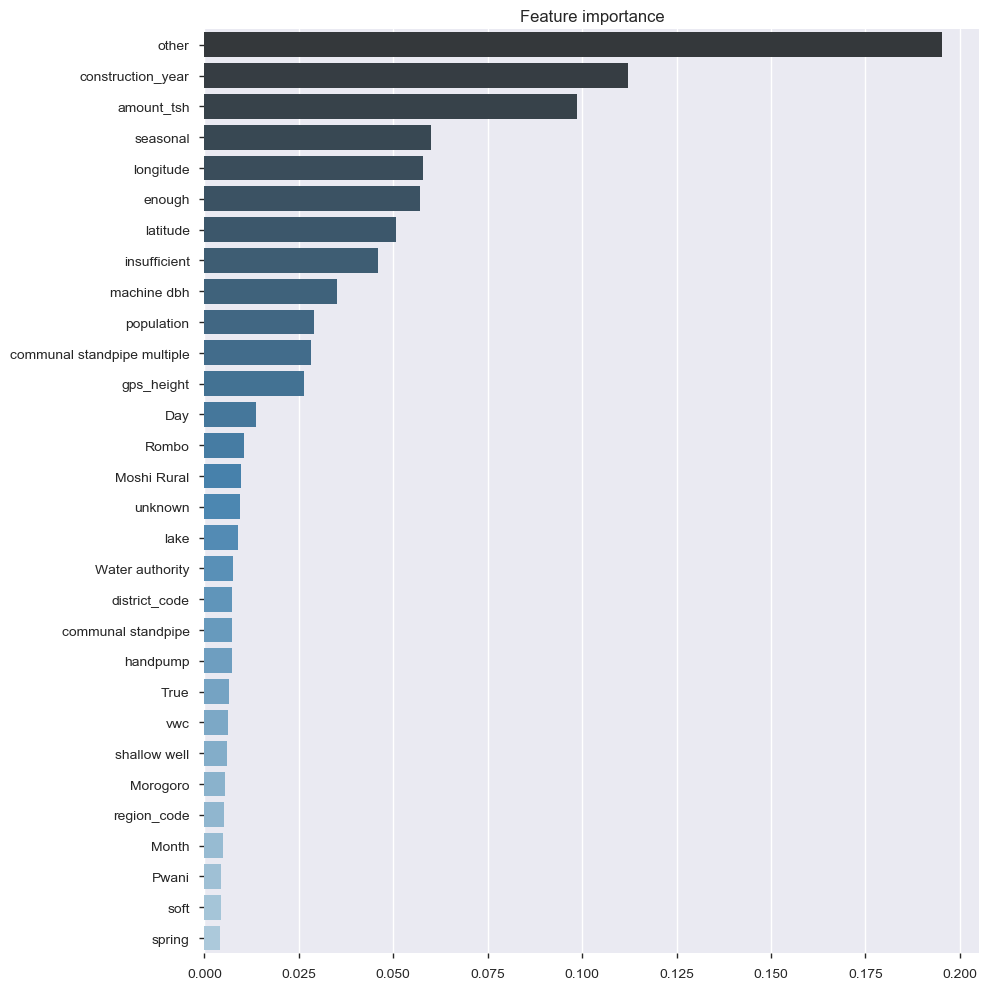

In [56]:

importances = model.feature_importances_
weights = pd.Series(importances, index=X.columns.values).sort_values(ascending=False)[:30]
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=weights.index, x=weights.values, palette="Blues_d", orient='h')

In [194]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton', loss_function='MultiClass', eval_metric='Accuracy')

categorical_features_indices = np.where(X.dtypes != np.float)[0]
model.fit(X_train,y_train,cat_features=categorical_features_indices,verbose=100,eval_set=(X_test, y_test))

# model.predict(x_train)
# model.predict(y_test)
x_predrf = model.predict(X_train)
y_predrf = model.predict(X_test)
print("Accuracy Test: ", accuracy_score(y_test, y_predrf))
print("Accuracy Train: ", accuracy_score(y_train, x_predrf))

print("Precesion Test: ", precision_score(y_test, y_predrf, average='weighted'))
print("Precesion: Train", precision_score(y_train, x_predrf, average='weighted'))

print("Recall: Test", recall_score(y_test, y_predrf, average='weighted'))
print("Recall: Train", recall_score(y_train, x_predrf, average='weighted'))

print('Confusion_Matrix',confusion_matrix(y_test, y_predrf))
print('Classification_Report',classification_report(y_test,y_predrf ))

print('KAPPA SCORE: ',cohen_kappa_score(y_test,y_predrf ))
pd.crosstab(y_test, y_predrf, rownames=['True'], colnames=['Predicted'], margins=True)

0:	learn: 0.7140780	test: 0.7093002	best: 0.7093002 (0)	total: 4.31s	remaining: 1h 11m 42s
1:	learn: 0.7303749	test: 0.7271510	best: 0.7271510 (1)	total: 6.16s	remaining: 51m 13s
2:	learn: 0.7336649	test: 0.7290253	best: 0.7290253 (2)	total: 7.53s	remaining: 41m 42s
3:	learn: 0.7343152	test: 0.7295609	best: 0.7295609 (3)	total: 8.89s	remaining: 36m 54s
4:	learn: 0.7349273	test: 0.7333988	best: 0.7333988 (4)	total: 10.4s	remaining: 34m 32s
5:	learn: 0.7389441	test: 0.7353624	best: 0.7353624 (5)	total: 12.1s	remaining: 33m 17s
6:	learn: 0.7420811	test: 0.7405391	best: 0.7405391 (6)	total: 13.5s	remaining: 32m
7:	learn: 0.7444912	test: 0.7434845	best: 0.7434845 (7)	total: 15s	remaining: 30m 54s
8:	learn: 0.7464422	test: 0.7445555	best: 0.7445555 (8)	total: 16.3s	remaining: 29m 56s
9:	learn: 0.7458301	test: 0.7447340	best: 0.7447340 (9)	total: 17.7s	remaining: 29m 8s
10:	learn: 0.7465953	test: 0.7462513	best: 0.7462513 (10)	total: 19s	remaining: 28m 29s
11:	learn: 0.7454476	test: 0.7461621

92:	learn: 0.7748279	test: 0.7794538	best: 0.7794538 (92)	total: 2m 24s	remaining: 23m 31s
93:	learn: 0.7750191	test: 0.7800785	best: 0.7800785 (93)	total: 2m 26s	remaining: 23m 28s
94:	learn: 0.7749809	test: 0.7803463	best: 0.7803463 (94)	total: 2m 27s	remaining: 23m 26s
95:	learn: 0.7752487	test: 0.7806141	best: 0.7806141 (95)	total: 2m 29s	remaining: 23m 25s
96:	learn: 0.7757460	test: 0.7810603	best: 0.7810603 (96)	total: 2m 30s	remaining: 23m 22s
97:	learn: 0.7759373	test: 0.7814174	best: 0.7814174 (97)	total: 2m 32s	remaining: 23m 20s
98:	learn: 0.7761285	test: 0.7815959	best: 0.7815959 (98)	total: 2m 32s	remaining: 23m 11s
99:	learn: 0.7760520	test: 0.7815066	best: 0.7815959 (98)	total: 2m 33s	remaining: 23m 3s
100:	learn: 0.7760903	test: 0.7812388	best: 0.7815959 (98)	total: 2m 35s	remaining: 23m 3s
101:	learn: 0.7758607	test: 0.7818636	best: 0.7818636 (101)	total: 2m 36s	remaining: 23m 1s
102:	learn: 0.7765111	test: 0.7818636	best: 0.7818636 (101)	total: 2m 38s	remaining: 23m
1

181:	learn: 0.7861515	test: 0.7921278	best: 0.7922171 (179)	total: 4m 43s	remaining: 21m 15s
182:	learn: 0.7863045	test: 0.7923956	best: 0.7923956 (182)	total: 4m 45s	remaining: 21m 15s
183:	learn: 0.7863810	test: 0.7923063	best: 0.7923956 (182)	total: 4m 47s	remaining: 21m 14s
184:	learn: 0.7864958	test: 0.7923063	best: 0.7923956 (182)	total: 4m 48s	remaining: 21m 12s
185:	learn: 0.7865340	test: 0.7928418	best: 0.7928418 (185)	total: 4m 50s	remaining: 21m 10s
186:	learn: 0.7866106	test: 0.7928418	best: 0.7928418 (185)	total: 4m 51s	remaining: 21m 8s
187:	learn: 0.7866106	test: 0.7930203	best: 0.7930203 (187)	total: 4m 53s	remaining: 21m 5s
188:	learn: 0.7866106	test: 0.7931989	best: 0.7931989 (188)	total: 4m 54s	remaining: 21m 4s
189:	learn: 0.7866871	test: 0.7931989	best: 0.7931989 (188)	total: 4m 56s	remaining: 21m 3s
190:	learn: 0.7868018	test: 0.7930203	best: 0.7931989 (188)	total: 4m 58s	remaining: 21m 2s
191:	learn: 0.7868401	test: 0.7930203	best: 0.7931989 (188)	total: 5m	remai

270:	learn: 0.7907422	test: 0.7959657	best: 0.7959657 (252)	total: 7m	remaining: 18m 49s
271:	learn: 0.7910482	test: 0.7961442	best: 0.7961442 (271)	total: 7m 1s	remaining: 18m 47s
272:	learn: 0.7912012	test: 0.7962335	best: 0.7962335 (272)	total: 7m 2s	remaining: 18m 45s
273:	learn: 0.7911247	test: 0.7960550	best: 0.7962335 (272)	total: 7m 3s	remaining: 18m 41s
274:	learn: 0.7910865	test: 0.7960550	best: 0.7962335 (272)	total: 7m 4s	remaining: 18m 39s
275:	learn: 0.7910865	test: 0.7961442	best: 0.7962335 (272)	total: 7m 4s	remaining: 18m 34s
276:	learn: 0.7911247	test: 0.7960550	best: 0.7962335 (272)	total: 7m 5s	remaining: 18m 31s
277:	learn: 0.7912012	test: 0.7959657	best: 0.7962335 (272)	total: 7m 7s	remaining: 18m 30s
278:	learn: 0.7912012	test: 0.7962335	best: 0.7962335 (272)	total: 7m 9s	remaining: 18m 29s
279:	learn: 0.7912395	test: 0.7963227	best: 0.7963227 (279)	total: 7m 10s	remaining: 18m 27s
280:	learn: 0.7914308	test: 0.7960550	best: 0.7963227 (279)	total: 7m 12s	remainin

359:	learn: 0.7956771	test: 0.7996251	best: 0.7996251 (359)	total: 9m 10s	remaining: 16m 19s
360:	learn: 0.7955241	test: 0.7996251	best: 0.7996251 (359)	total: 9m 12s	remaining: 16m 17s
361:	learn: 0.7957919	test: 0.8000714	best: 0.8000714 (361)	total: 9m 13s	remaining: 16m 15s
362:	learn: 0.7958684	test: 0.8002499	best: 0.8002499 (362)	total: 9m 15s	remaining: 16m 14s
363:	learn: 0.7959832	test: 0.8002499	best: 0.8002499 (362)	total: 9m 16s	remaining: 16m 12s
364:	learn: 0.7960214	test: 0.8009639	best: 0.8009639 (364)	total: 9m 18s	remaining: 16m 11s
365:	learn: 0.7960214	test: 0.8009639	best: 0.8009639 (364)	total: 9m 19s	remaining: 16m 9s
366:	learn: 0.7960214	test: 0.8009639	best: 0.8009639 (364)	total: 9m 20s	remaining: 16m 7s
367:	learn: 0.7959449	test: 0.8009639	best: 0.8009639 (364)	total: 9m 22s	remaining: 16m 5s
368:	learn: 0.7960979	test: 0.8010532	best: 0.8010532 (368)	total: 9m 23s	remaining: 16m 3s
369:	learn: 0.7960979	test: 0.8010532	best: 0.8010532 (368)	total: 9m 25s	

447:	learn: 0.7982785	test: 0.8040878	best: 0.8040878 (437)	total: 11m 24s	remaining: 14m 3s
448:	learn: 0.7982402	test: 0.8039093	best: 0.8040878 (437)	total: 11m 25s	remaining: 14m 1s
449:	learn: 0.7982785	test: 0.8038201	best: 0.8040878 (437)	total: 11m 27s	remaining: 14m
450:	learn: 0.7981637	test: 0.8039986	best: 0.8040878 (437)	total: 11m 28s	remaining: 13m 58s
451:	learn: 0.7984315	test: 0.8042663	best: 0.8042663 (451)	total: 11m 30s	remaining: 13m 57s
452:	learn: 0.7985080	test: 0.8042663	best: 0.8042663 (451)	total: 11m 32s	remaining: 13m 55s
453:	learn: 0.7983933	test: 0.8042663	best: 0.8042663 (451)	total: 11m 33s	remaining: 13m 54s
454:	learn: 0.7983168	test: 0.8041771	best: 0.8042663 (451)	total: 11m 34s	remaining: 13m 52s
455:	learn: 0.7983550	test: 0.8040878	best: 0.8042663 (451)	total: 11m 36s	remaining: 13m 51s
456:	learn: 0.7984315	test: 0.8041771	best: 0.8042663 (451)	total: 11m 38s	remaining: 13m 49s
457:	learn: 0.7985463	test: 0.8042663	best: 0.8042663 (451)	total:

535:	learn: 0.8006121	test: 0.8056944	best: 0.8056944 (535)	total: 13m 41s	remaining: 11m 51s
536:	learn: 0.8005738	test: 0.8057836	best: 0.8057836 (536)	total: 13m 43s	remaining: 11m 50s
537:	learn: 0.8004591	test: 0.8056944	best: 0.8057836 (536)	total: 13m 45s	remaining: 11m 48s
538:	learn: 0.8004591	test: 0.8055159	best: 0.8057836 (536)	total: 13m 46s	remaining: 11m 47s
539:	learn: 0.8004973	test: 0.8058729	best: 0.8058729 (539)	total: 13m 48s	remaining: 11m 45s
540:	learn: 0.8005356	test: 0.8058729	best: 0.8058729 (539)	total: 13m 50s	remaining: 11m 44s
541:	learn: 0.8005356	test: 0.8057836	best: 0.8058729 (539)	total: 13m 51s	remaining: 11m 42s
542:	learn: 0.8005738	test: 0.8057836	best: 0.8058729 (539)	total: 13m 52s	remaining: 11m 40s
543:	learn: 0.8007651	test: 0.8056944	best: 0.8058729 (539)	total: 13m 54s	remaining: 11m 39s
544:	learn: 0.8007269	test: 0.8056051	best: 0.8058729 (539)	total: 13m 55s	remaining: 11m 37s
545:	learn: 0.8007651	test: 0.8056051	best: 0.8058729 (539)	

623:	learn: 0.8025631	test: 0.8064084	best: 0.8067654 (615)	total: 16m 2s	remaining: 9m 40s
624:	learn: 0.8024484	test: 0.8063192	best: 0.8067654 (615)	total: 16m 4s	remaining: 9m 38s
625:	learn: 0.8023718	test: 0.8063192	best: 0.8067654 (615)	total: 16m 5s	remaining: 9m 36s
626:	learn: 0.8023336	test: 0.8064977	best: 0.8067654 (615)	total: 16m 7s	remaining: 9m 35s
627:	learn: 0.8023336	test: 0.8063192	best: 0.8067654 (615)	total: 16m 8s	remaining: 9m 33s
628:	learn: 0.8023336	test: 0.8064977	best: 0.8067654 (615)	total: 16m 9s	remaining: 9m 32s
629:	learn: 0.8024484	test: 0.8064977	best: 0.8067654 (615)	total: 16m 11s	remaining: 9m 30s
630:	learn: 0.8025249	test: 0.8064977	best: 0.8067654 (615)	total: 16m 13s	remaining: 9m 29s
631:	learn: 0.8024484	test: 0.8065869	best: 0.8067654 (615)	total: 16m 14s	remaining: 9m 27s
632:	learn: 0.8024484	test: 0.8066762	best: 0.8067654 (615)	total: 16m 15s	remaining: 9m 25s
633:	learn: 0.8026014	test: 0.8066762	best: 0.8067654 (615)	total: 16m 17s	r

712:	learn: 0.8038638	test: 0.8082828	best: 0.8082828 (692)	total: 18m 30s	remaining: 7m 27s
713:	learn: 0.8038638	test: 0.8083720	best: 0.8083720 (713)	total: 18m 32s	remaining: 7m 25s
714:	learn: 0.8038256	test: 0.8081042	best: 0.8083720 (713)	total: 18m 33s	remaining: 7m 24s
715:	learn: 0.8038638	test: 0.8080150	best: 0.8083720 (713)	total: 18m 35s	remaining: 7m 22s
716:	learn: 0.8039021	test: 0.8081935	best: 0.8083720 (713)	total: 18m 37s	remaining: 7m 20s
717:	learn: 0.8039786	test: 0.8081935	best: 0.8083720 (713)	total: 18m 38s	remaining: 7m 19s
718:	learn: 0.8039403	test: 0.8081935	best: 0.8083720 (713)	total: 18m 40s	remaining: 7m 17s
719:	learn: 0.8040551	test: 0.8081935	best: 0.8083720 (713)	total: 18m 41s	remaining: 7m 16s
720:	learn: 0.8040933	test: 0.8081042	best: 0.8083720 (713)	total: 18m 43s	remaining: 7m 14s
721:	learn: 0.8040168	test: 0.8081935	best: 0.8083720 (713)	total: 18m 44s	remaining: 7m 13s
722:	learn: 0.8040551	test: 0.8083720	best: 0.8083720 (713)	total: 18m

801:	learn: 0.8062357	test: 0.8087290	best: 0.8089968 (740)	total: 20m 44s	remaining: 5m 7s
802:	learn: 0.8062357	test: 0.8087290	best: 0.8089968 (740)	total: 20m 46s	remaining: 5m 5s
803:	learn: 0.8062357	test: 0.8087290	best: 0.8089968 (740)	total: 20m 47s	remaining: 5m 4s
804:	learn: 0.8062357	test: 0.8087290	best: 0.8089968 (740)	total: 20m 48s	remaining: 5m 2s
805:	learn: 0.8062357	test: 0.8087290	best: 0.8089968 (740)	total: 20m 50s	remaining: 5m
806:	learn: 0.8061974	test: 0.8087290	best: 0.8089968 (740)	total: 20m 51s	remaining: 4m 59s
807:	learn: 0.8062357	test: 0.8087290	best: 0.8089968 (740)	total: 20m 53s	remaining: 4m 57s
808:	learn: 0.8061974	test: 0.8086398	best: 0.8089968 (740)	total: 20m 54s	remaining: 4m 56s
809:	learn: 0.8063122	test: 0.8086398	best: 0.8089968 (740)	total: 20m 56s	remaining: 4m 54s
810:	learn: 0.8063122	test: 0.8087290	best: 0.8089968 (740)	total: 20m 57s	remaining: 4m 53s
811:	learn: 0.8063887	test: 0.8087290	best: 0.8089968 (740)	total: 20m 59s	rem

890:	learn: 0.8075746	test: 0.8093538	best: 0.8095323 (871)	total: 22m 53s	remaining: 2m 48s
891:	learn: 0.8074598	test: 0.8094431	best: 0.8095323 (871)	total: 22m 54s	remaining: 2m 46s
892:	learn: 0.8075746	test: 0.8095323	best: 0.8095323 (871)	total: 22m 56s	remaining: 2m 44s
893:	learn: 0.8075363	test: 0.8093538	best: 0.8095323 (871)	total: 22m 57s	remaining: 2m 43s
894:	learn: 0.8075746	test: 0.8093538	best: 0.8095323 (871)	total: 22m 58s	remaining: 2m 41s
895:	learn: 0.8076511	test: 0.8093538	best: 0.8095323 (871)	total: 23m	remaining: 2m 40s
896:	learn: 0.8076894	test: 0.8093538	best: 0.8095323 (871)	total: 23m 1s	remaining: 2m 38s
897:	learn: 0.8076511	test: 0.8092645	best: 0.8095323 (871)	total: 23m 3s	remaining: 2m 37s
898:	learn: 0.8078041	test: 0.8093538	best: 0.8095323 (871)	total: 23m 4s	remaining: 2m 35s
899:	learn: 0.8078041	test: 0.8093538	best: 0.8095323 (871)	total: 23m 6s	remaining: 2m 34s
900:	learn: 0.8078424	test: 0.8093538	best: 0.8095323 (871)	total: 23m 7s	rema

979:	learn: 0.8084927	test: 0.8098001	best: 0.8100678 (972)	total: 25m 1s	remaining: 30.6s
980:	learn: 0.8085310	test: 0.8099786	best: 0.8100678 (972)	total: 25m 2s	remaining: 29.1s
981:	learn: 0.8086840	test: 0.8100678	best: 0.8100678 (972)	total: 25m 4s	remaining: 27.6s
982:	learn: 0.8085310	test: 0.8101571	best: 0.8101571 (982)	total: 25m 5s	remaining: 26s
983:	learn: 0.8084927	test: 0.8101571	best: 0.8101571 (982)	total: 25m 7s	remaining: 24.5s
984:	learn: 0.8085692	test: 0.8099786	best: 0.8101571 (982)	total: 25m 8s	remaining: 23s
985:	learn: 0.8085310	test: 0.8099786	best: 0.8101571 (982)	total: 25m 10s	remaining: 21.4s
986:	learn: 0.8087223	test: 0.8097108	best: 0.8101571 (982)	total: 25m 12s	remaining: 19.9s
987:	learn: 0.8086458	test: 0.8100678	best: 0.8101571 (982)	total: 25m 13s	remaining: 18.4s
988:	learn: 0.8086458	test: 0.8100678	best: 0.8101571 (982)	total: 25m 15s	remaining: 16.9s
989:	learn: 0.8087605	test: 0.8100678	best: 0.8101571 (982)	total: 25m 16s	remaining: 15.3

Exception: Data must be 1-dimensional

In [207]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(model.tree_count_ * 1.2),loss_function='MultiClass', eval_metric='Accuracy'
)
best_model.fit(
    X, Y,
    cat_features=categorical_features_indices,
    verbose=100, plot=True, eval_set=(X_train, y_train)
)

x_predrf = best_model.predict(X_train)
y_predrf = best_model.predict(X_test)
print("Accuracy Test: ", accuracy_score(y_test, y_predrf))
print("Accuracy Train: ", accuracy_score(y_train, x_predrf))

print("Precesion Test: ", precision_score(y_test, y_predrf, average='weighted'))
print("Precesion: Train", precision_score(y_train, x_predrf, average='weighted'))

print("Recall: Test", recall_score(y_test, y_predrf, average='weighted'))
print("Recall: Train", recall_score(y_train, x_predrf, average='weighted'))

print('Confusion_Matrix',confusion_matrix(y_test, y_predrf))
print('Classification_Report',classification_report(y_test,y_predrf ))

print('KAPPA SCORE: ',cohen_kappa_score(y_test,y_predrf ))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6888657	test: 0.6882555	best: 0.6882555 (0)	total: 1.15s	remaining: 22m 29s
100:	learn: 0.7483665	test: 0.7485463	best: 0.7485463 (100)	total: 31.6s	remaining: 5m 37s
200:	learn: 0.7590510	test: 0.7587605	best: 0.7587605 (200)	total: 1m	remaining: 4m 52s
300:	learn: 0.7665221	test: 0.7666412	best: 0.7666412 (300)	total: 1m 29s	remaining: 4m 19s
400:	learn: 0.7756266	test: 0.7756312	best: 0.7756312 (400)	total: 1m 58s	remaining: 3m 49s
500:	learn: 0.7841420	test: 0.7838944	best: 0.7838944 (500)	total: 2m 31s	remaining: 3m 24s
600:	learn: 0.7896851	test: 0.7895180	best: 0.7897475 (590)	total: 3m 5s	remaining: 2m 58s
700:	learn: 0.7943980	test: 0.7943382	best: 0.7944147 (699)	total: 4m 16s	remaining: 2m 54s
800:	learn: 0.7979595	test: 0.7985080	best: 0.7985845 (797)	total: 4m 52s	remaining: 2m 17s
900:	learn: 0.8012532	test: 0.8018745	best: 0.8018745 (900)	total: 5m 27s	remaining: 1m 41s
1000:	learn: 0.8036097	test: 0.8040933	best: 0.8040933 (1000)	total: 6m 7s	remaining: 1m 5

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=22, max_depth= 14 )

from sklearn.model_selection import cross_val_score
cross_val_score(classifier, X, Y, cv=3)

Accuracy Test:  0.7877543734380579
Accuracy Train:  0.8493496557000765
Precesion Test:  0.7943460453891797
Precesion: Train 0.8636479725930241
Recall: Test 0.7877543734380579
Recall: Train 0.8493496557000765
Confusion_Matrix [[5832   26  355]
 [ 495  125  130]
 [1354   18 2869]]
Classification_Report                          precision    recall  f1-score   support

             functional       0.76      0.94      0.84      6213
functional needs repair       0.74      0.17      0.27       750
         non functional       0.86      0.68      0.76      4241

              micro avg       0.79      0.79      0.79     11204
              macro avg       0.78      0.59      0.62     11204
           weighted avg       0.79      0.79      0.77     11204

KAPPA SCORE:  0.5801358029537683


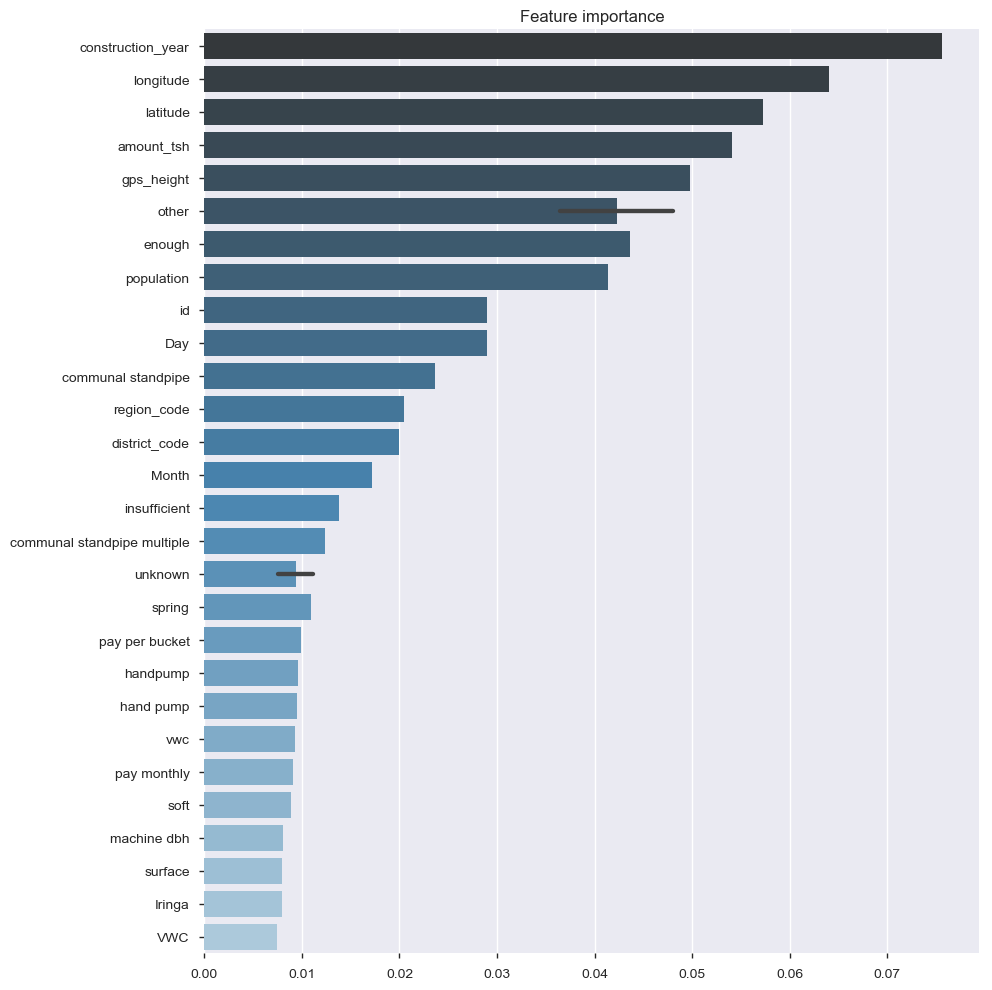

In [115]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state=22, max_depth= 14 )
classifier.fit(X_train, y_train)
x_predrf = classifier.predict(X_train)
y_predrf = classifier.predict(X_test)
print("Accuracy Test: ", accuracy_score(y_test, y_predrf))
print("Accuracy Train: ", accuracy_score(y_train, x_predrf))

print("Precesion Test: ", precision_score(y_test, y_predrf, average='weighted'))
print("Precesion: Train", precision_score(y_train, x_predrf, average='weighted'))

print("Recall: Test", recall_score(y_test, y_predrf, average='weighted'))
print("Recall: Train", recall_score(y_train, x_predrf, average='weighted'))

print('Confusion_Matrix',confusion_matrix(y_test, y_predrf))
print('Classification_Report',classification_report(y_test,y_predrf ))

print('KAPPA SCORE: ',cohen_kappa_score(y_test,y_predrf))


importances = classifier.feature_importances_
weights = pd.Series(importances, index=X.columns.values).sort_values(ascending=False)[:30]
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=weights.index, x=weights.values, palette="Blues_d", orient='h')

array([0.78888175, 0.79169344, 0.7873554 ])

In [41]:
for i, j in sorted(zip(model.feature_importances_, X_train.columns)):
    print(i,j)

8.938203319443349e-08 None
4.11996952884165e-05 Songea Urban
4.526693678128702e-05 Lindi Urban
4.82858326436771e-05 dam
6.053357642830515e-05 fluoride abandoned
8.822038477419945e-05 Ilemela
9.367964671997003e-05 Moshi Urban
0.00010583700071627403 Kigoma Urban
0.00014156745323972103 Mtwara Urban
0.0001440818552983326 unknown
0.00014424596444396185 Arusha Urban
0.00017902124005490138 Tanga
0.00018092928203941957 SWC
0.0001860832790655023 Trust
0.00018643303054632538 Hai
0.00019497878797231937 Nanyumbu
0.00021523382178501122 Temeke
0.00023409357364146126 other - school
0.0002543817836902063 Liwale
0.0002758755510000627 wind-powered
0.0002859597540166311 Singida Urban
0.0002942453911327799 Kilwa
0.0002966681364023491 Morogoro Urban
0.00032978493893917073 other
0.0003520254194735667 Monduli
0.00035241447119273463 Handeni
0.00037928699361293103 Sumbawanga Urban
0.0003829128715249914 Mwanza
0.0003951544426824143 Ilala
0.00040121445127753774 Lushoto
0.00041143295075083 Kinondoni
0.00044610460

In [40]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

model.fit(X, Y)
# display the relative importance of each attribute
# print(model.feature_importances_)

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

C:\Users\GD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[8.68870632e-03 1.88747206e-03 7.90149113e-03 3.44569020e-03
 2.30745770e-02 7.83894205e-03 4.82858326e-05 5.79104294e-03
 3.16238895e-03 4.26783447e-02 5.45551421e-03 6.38519780e-04
 9.12804345e-04 3.04378348e-03 7.25951586e-03 3.29784939e-04
 2.43540435e-03 4.35656121e-03 5.40696450e-03 7.15060593e-03
 1.44081855e-04 3.88202461e-02 1.70220520e-02 9.21825755e-03
 2.16067570e-03 9.11053911e-04 6.05335764e-05 5.69633077e-04
 5.10094752e-03 5.36994833e-04 7.86808582e-03 6.96650317e-03
 1.23813727e-03 5.73444466e-03 1.01767071e-02 1.31321839e-02
 4.38125355e-03 6.16474853e-03 9.35820070e-04 1.09489343e-03
 1.15982534e-03 4.38121324e-03 7.03864404e-04 2.34093574e-04
 1.10063032e-03 3.37352094e-03 4.46104603e-04 5.63900011e-04
 8.96680924e-03 1.30653670e-03 2.05478681e-03 1.61864669e-03
 1.93983475e-03 7.26785603e-03 3.38459146e-03 2.60664285e-02
 9.45775481e-04 6.20900412e-03 2.75875551e-04 8.93820332e-08
 1.06306833e-03 1.20735191e-03 1.01641153e-03 1.80929282e-04
 1.86083279e-04 5.085478

In [210]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

In [211]:
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
latitude,9.583141e-02
longitude,9.525613e-02
gps_height,8.810934e-02
construction_year,7.043767e-02
population,6.365655e-02
Day,4.228837e-02
enough,4.177477e-02
other,2.923274e-02
amount_tsh,1.959557e-02
insufficient,1.748577e-02


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(classifier, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())


In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=5)
lda.fit(X_train, y_train)
x_predrf = lda.predict(X_train)
y_predrf = lda.predict(X_test)
print("Accuracy Test: ", accuracy_score(y_test, y_predrf))
print("Accuracy Train: ", accuracy_score(y_train, x_predrf))

print("Precesion Test: ", precision_score(y_test, y_predrf, average='weighted'))
print("Precesion: Train", precision_score(y_train, x_predrf, average='weighted'))

print("Recall: Test", recall_score(y_test, y_predrf, average='weighted'))
print("Recall: Train", recall_score(y_train, x_predrf, average='weighted'))

print('Confusion_Matrix',confusion_matrix(y_test, y_predrf))
print('Classification_Report',classification_report(y_test,y_predrf ))

print('KAPPA SCORE: ',cohen_kappa_score(y_test,y_predrf))

pd.crosstab(y_test, y_predrf, rownames=['True'], colnames=['Predicted'], margins=True)

C:\Users\GD\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy Test:  0.7449125312388433
Accuracy Train:  0.7480107115531752
Precesion Test:  0.7382376205175937
Precesion: Train 0.7428563426356396
Recall: Test 0.7449125312388433
Recall: Train 0.7480107115531752
Confusion_Matrix [[5563  135  515]
 [ 454  144  152]
 [1524   78 2639]]
Classification_Report                          precision    recall  f1-score   support

             functional       0.74      0.90      0.81      6213
functional needs repair       0.40      0.19      0.26       750
         non functional       0.80      0.62      0.70      4241

              micro avg       0.74      0.74      0.74     11204
              macro avg       0.65      0.57      0.59     11204
           weighted avg       0.74      0.74      0.73     11204

KAPPA SCORE:  0.5026931898978158


Predicted,functional,functional needs repair,non functional,All
True,,,,
functional,5563,135,515,6213
functional needs repair,454,144,152,750
non functional,1524,78,2639,4241
All,7541,357,3306,11204
